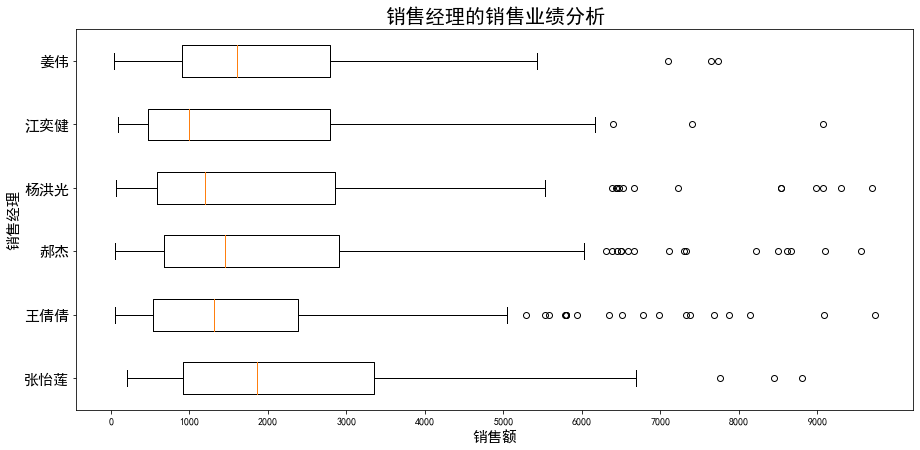

In [2]:
# -*- coding: utf-8 -*-

#声明Notebook类型，必须在引入pyecharts.charts等模块前声明
from pyecharts.globals import CurrentConfig, NotebookType
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_LAB

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
from impala.dbapi import connect

#读取Hadoop集群数据
v1 = []
v2 = []
v3 = []
conn = connect(host='192.168.1.7', port=10000, database='sales',auth_mechanism='NOSASL',user='root')
cur = conn.cursor()
sql_num = "SELECT manager,sales FROM orders WHERE dt=2019 and category='家具' and sales<=10000"
cur.execute(sql_num)
sh = cur.fetchall()
for s in sh:
    v1.append(s[0])
    v2.append(s[1])

data = np.transpose(pd.DataFrame([v1,v2]))
data.columns = ['销售经理', '利润额']

group=data.销售经理.unique()
def group():
    df=[]
    group=data.销售经理.unique()
    for x in group:
        a=data.利润额[data.销售经理==x]
        df.append(a)
    return df
box1,box2,box3,box4,box5,box6=group()[0],group()[1],group()[2],group()[3],group()[4],group()[5]

#绘制箱线图并设置需要的参数
plt.figure(figsize=(15,7))
plt.boxplot([box1,box2,box3,box4,box5,box6],vert=False,showmeans=False,showbox = True)
plt.yticks([1, 2, 3, 4, 5, 6],['张怡莲', '王倩倩', '郝杰', '杨洪光', '江奕健', '姜伟'])
          
plt.xticks(np.arange(0,10000,step=1000))
plt.xlabel('销售额',fontsize=15.0)
plt.ylabel('销售经理',fontsize=15.0)
plt.title('销售经理的销售业绩分析',fontsize=20.0)
plt.yticks(fontsize=15.0)
plt.show()